In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
# Load the dataset
data = pd.read_csv('wine.csv')
#check distrubution of the data
data.describe()
data.head()


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [3]:
#check null value
data.isnull().sum()

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         6497 non-null   float64
 1   volatile.acidity      6497 non-null   float64
 2   citric.acid           6497 non-null   float64
 3   residual.sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free.sulfur.dioxide   6497 non-null   float64
 6   total.sulfur.dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
# Separate the features from the labels
X = data.drop(columns=['quality', 'color'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
pca_result

array([[-3.20599617,  0.41652332],
       [-3.03905081,  1.10746213],
       [-3.07189347,  0.87896444],
       ...,
       [ 0.5711325 , -0.72266165],
       [ 0.09005243, -3.54577991],
       [ 0.51257566, -2.89104008]])

Text(0, 0.5, 'Principal Component 2')

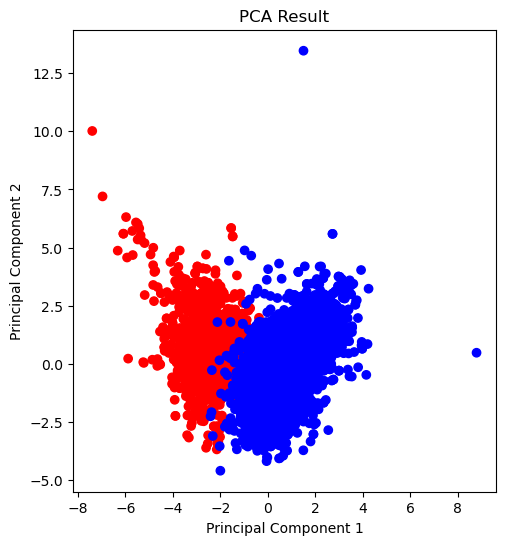

In [7]:
# Visualize PCA results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=data['color'].map({'red': 'red', 'white': 'blue'}))
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

In [8]:
# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(X_scaled)

Text(0, 0.5, 't-SNE Dimension 2')

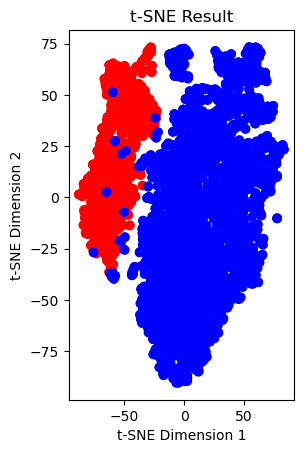

In [9]:
# Visualize t-SNE results
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=data['color'].map({'red': 'red', 'white': 'blue'}))
plt.title('t-SNE Result')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

Text(0, 0.5, 't-SNE Dimension 2')

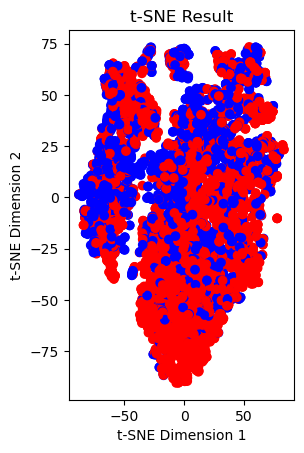

In [10]:
quality_labels = data['quality']
colors = ['red' if q > 5 else 'blue' for q in quality_labels]
# Visualize t-SNE results
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=colors)
plt.title('t-SNE Result')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

In [11]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=2,n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

Text(0, 0.5, 't-SNE Dimension 2')

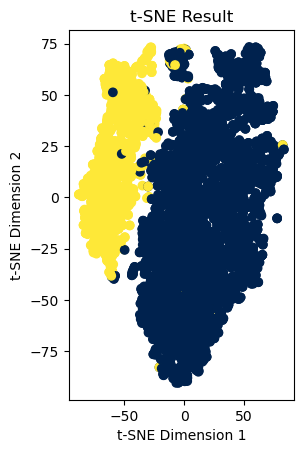

In [12]:
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=clusters, cmap = "cividis")
plt.title('t-SNE Result')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')